In [57]:

import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Step 1: Data Preparation
# Load the red wine dataset
red_wine_data = pd.read_csv("C:/Users/wei ying/Downloads/Dataset/Dataset/winequality-red.csv", delimiter=';')

# Load the white wine dataset
white_wine_data = pd.read_csv("C:/Users/wei ying/Downloads/Dataset/Dataset/winequality-white.csv", delimiter=';')

# Add a 'Type' column to mark the dataset as red wine
red_wine_data['Type'] = 'R'

# Add a 'Type' column to mark the dataset as white wine
white_wine_data['Type'] = 'W'

# Merge the red and white wine datasets
wine_data = pd.concat([red_wine_data, white_wine_data], axis=0)
print("Wine data")
print(wine_data)

Wine data
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur

In [58]:
# Data Preprocessing
from sklearn import preprocessing

# Encode categorical variables into numerical values
Label = preprocessing.LabelEncoder()
wineType = Label.fit_transform(wine_data["Type"])
wine_data["Type"] = wineType
print(
    wine_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [59]:
# getting some information about the data
print("Information of the data")
wine_data.info()

Information of the data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Type                  6497 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 685.2 KB


In [24]:
# checking for missing values
print("Checking for missing values")
wine_data.isnull().sum()

Checking for missing values


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64

In [25]:
# statistical measures about the data
print("Statistical measures about the data")
data_frame.describe()

Statistical measures about the data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [26]:
# checking the distribution of Target Varibale
wine_data['Type'].value_counts()

1    4898
0    1599
Name: Type, dtype: int64

In [29]:
wine_data.groupby('Type').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Type,,,,,,,,,,,,
0,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
1,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909


In [84]:
# Separate features and target variable
features = wine_data.drop('Type', axis=1)
target = wine_data['Type']
print("Feautures")
print(features)
print()
print("Target variable")
print(target)

Feautures
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur

In [32]:
# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [38]:
# Feature scaling
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)
X_val_std = scaler.fit_transform(X_val)

In [39]:
# importing tensorflow and Keras
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [219]:
# Model Development
# Define 5 different neural network architectures
# set hyperparameters
no_epochs = 150

# Architecture 1
model_1 = Sequential()
model_1.add(Dense(64, input_dim = 12, activation = 'relu'))
model_1.add(Dense(1, activation='sigmoid'))

# visualize the architecture graphically, but need the installation of 'pydot'
#from tensorflow.keras.utils import plot_model
#plot_model(model_1, to_file='model_1_architecture.png', show_shapes=True)

# Architecture 2
model_2 = Sequential()
model_2.add(Dense(128, activation='relu', input_dim = 12))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

# Architecture 3
model_3 = Sequential()
model_3.add(Dense(256, activation='relu', input_dim = 12))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

# Architecture 4
model_4 = Sequential()
model_4.add(Dense(128, activation='tanh', input_dim = 12))
#model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))

# Architecture 5
model_5 = Sequential()
model_5.add(Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_dim = 12))
model_5.add(Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model_5.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model_5.add(Dense(1, activation='sigmoid'))

# display architecture of model
print("Model 1")
model_1.summary()
print()
print("Model 2")
model_2.summary()
print()
print("Model 3")
model_3.summary()
print()
print("Model 4")
model_4.summary()
print()
print("Model 5")
model_5.summary()

Model 1
Model: "sequential_167"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_571 (Dense)           (None, 64)                832       
                                                                 
 dense_572 (Dense)           (None, 1)                 65        
                                                                 
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________

Model 2
Model: "sequential_168"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_573 (Dense)           (None, 128)               1664      
                                                                 
 dense_574 (Dense)           (None, 64)                8256      
                                                                 
 dense_575 (D

In [220]:
# Complilation
model_1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_4.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_5.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [221]:
history_1 = model_1.fit(X_train_std, y_train, validation_data=(X_val_scaled, y_val), epochs=no_epochs, batch_size=32)

Epoch 1/150
147/147 [==============================] - 1s 2ms/step - loss: 0.2864 - accuracy: 0.9429 - val_loss: 0.0932 - val_accuracy: 0.9952
Epoch 2/150
147/147 [==============================] - 0s 1ms/step - loss: 0.0720 - accuracy: 0.9904 - val_loss: 0.0385 - val_accuracy: 0.9988
Epoch 3/150
147/147 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9930 - val_loss: 0.0257 - val_accuracy: 0.9988
Epoch 4/150
147/147 [==============================] - 0s 1ms/step - loss: 0.0343 - accuracy: 0.9938 - val_loss: 0.0206 - val_accuracy: 0.9988
Epoch 5/150
147/147 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.9942 - val_loss: 0.0180 - val_accuracy: 0.9988
Epoch 6/150
147/147 [==============================] - 0s 1ms/step - loss: 0.0274 - accuracy: 0.9949 - val_loss: 0.0165 - val_accuracy: 0.9988
Epoch 7/150
147/147 [==============================] - 0s 1ms/step - loss: 0.0255 - accuracy: 0.9953 - val_loss: 0.0153 - val_accuracy: 0.9988

In [222]:
history_2 = model_2.fit(X_train_std, y_train, validation_data=(X_val_scaled, y_val), epochs=no_epochs, batch_size=32)

Epoch 1/150
147/147 [==============================] - 1s 2ms/step - loss: 0.1221 - accuracy: 0.9727 - val_loss: 0.0169 - val_accuracy: 0.9988
Epoch 2/150
147/147 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.9947 - val_loss: 0.0132 - val_accuracy: 0.9988
Epoch 3/150
147/147 [==============================] - 0s 1ms/step - loss: 0.0219 - accuracy: 0.9960 - val_loss: 0.0127 - val_accuracy: 0.9976
Epoch 4/150
147/147 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 0.9964 - val_loss: 0.0108 - val_accuracy: 0.9976
Epoch 5/150
147/147 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 0.9966 - val_loss: 0.0101 - val_accuracy: 0.9976
Epoch 6/150
147/147 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9966 - val_loss: 0.0096 - val_accuracy: 0.9988
Epoch 7/150
147/147 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9968 - val_loss: 0.0089 - val_accuracy: 0.9988

In [223]:
history_3 = model_3.fit(X_train_std, y_train, validation_data=(X_val_scaled, y_val), epochs=no_epochs, batch_size=32)

Epoch 1/150
147/147 [==============================] - 1s 2ms/step - loss: 0.0719 - accuracy: 0.9870 - val_loss: 0.0152 - val_accuracy: 0.9988
Epoch 2/150
147/147 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9951 - val_loss: 0.0109 - val_accuracy: 0.9976
Epoch 3/150
147/147 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9949 - val_loss: 0.0133 - val_accuracy: 0.9964
Epoch 4/150
147/147 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9964 - val_loss: 0.0092 - val_accuracy: 0.9988
Epoch 5/150
147/147 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 0.9970 - val_loss: 0.0105 - val_accuracy: 0.9976
Epoch 6/150
147/147 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9974 - val_loss: 0.0078 - val_accuracy: 0.9988
Epoch 7/150
147/147 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9972 - val_loss: 0.0097 - val_accuracy: 0.9976

In [224]:
history_4 = model_4.fit(X_train_std, y_train, validation_data=(X_val_scaled, y_val), epochs=no_epochs, batch_size=32)

Epoch 1/150
147/147 [==============================] - 1s 2ms/step - loss: 0.2047 - accuracy: 0.9376 - val_loss: 0.0583 - val_accuracy: 0.9928
Epoch 2/150
147/147 [==============================] - 0s 1ms/step - loss: 0.0571 - accuracy: 0.9889 - val_loss: 0.0293 - val_accuracy: 0.9976
Epoch 3/150
147/147 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9936 - val_loss: 0.0217 - val_accuracy: 0.9988
Epoch 4/150
147/147 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 0.9923 - val_loss: 0.0186 - val_accuracy: 0.9988
Epoch 5/150
147/147 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.9930 - val_loss: 0.0170 - val_accuracy: 0.9988
Epoch 6/150
147/147 [==============================] - 0s 1ms/step - loss: 0.0310 - accuracy: 0.9934 - val_loss: 0.0162 - val_accuracy: 0.9988
Epoch 7/150
147/147 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9945 - val_loss: 0.0153 - val_accuracy: 0.9988

In [225]:
history_5 = model_5.fit(X_train_std, y_train, validation_data=(X_val_scaled, y_val), epochs=no_epochs, batch_size=32)

Epoch 1/150
147/147 [==============================] - 1s 3ms/step - loss: 0.0817 - accuracy: 0.9798 - val_loss: 0.0160 - val_accuracy: 0.9988
Epoch 2/150
147/147 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9955 - val_loss: 0.0117 - val_accuracy: 0.9976
Epoch 3/150
147/147 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9940 - val_loss: 0.0166 - val_accuracy: 0.9964
Epoch 4/150
147/147 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 0.9966 - val_loss: 0.0129 - val_accuracy: 0.9964
Epoch 5/150
147/147 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 0.9970 - val_loss: 0.0125 - val_accuracy: 0.9964
Epoch 6/150
147/147 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9964 - val_loss: 0.0094 - val_accuracy: 0.9988
Epoch 7/150
147/147 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9979 - val_loss: 0.0087 - val_accuracy: 0.9988

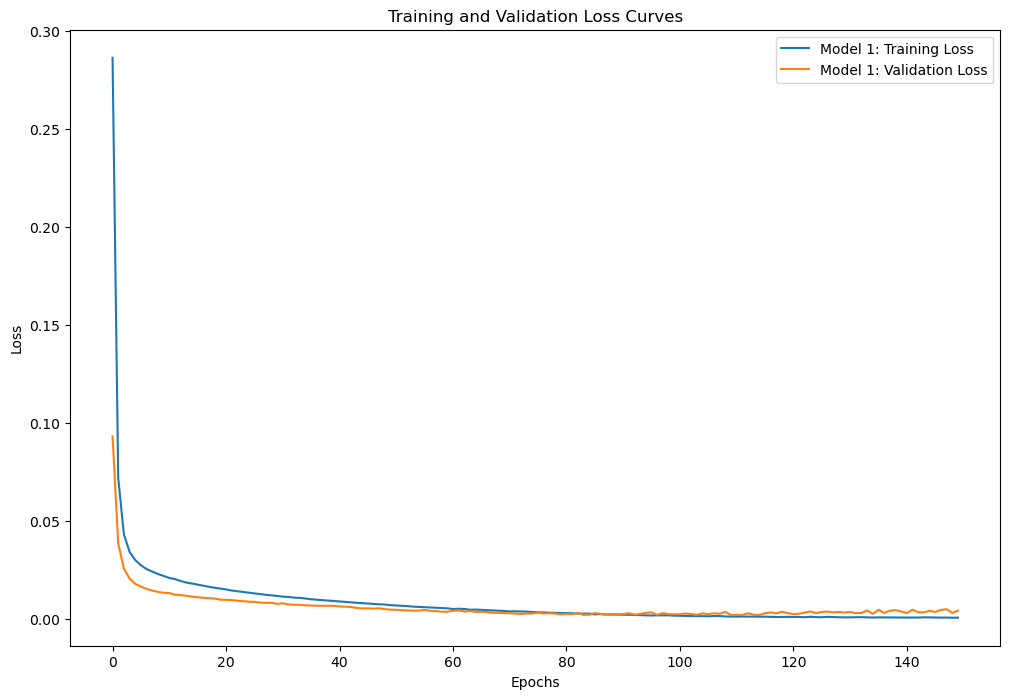

In [283]:
# Plot the training and validation loss curves
plt.figure(figsize=(12, 8))
plt.plot(history_1.history['loss'], label='Model 1: Training Loss')
plt.plot(history_1.history['val_loss'], label='Model 1: Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Observation and Analysis of Model 1
Convergence: 
1. Both the training and validation loss are converged.
2. The loss curve stabilize at the end.

Loss trend: 
1. Based on the overall trend of the training loss and validation loss over epochs, both decrease as the training progresses. 

Gap between Training Loss and Validation Loss: 
1. The gap or difference between the training loss and validation loss is small. 
2. A small gap indicates that the model is generalizing well to unseen data.

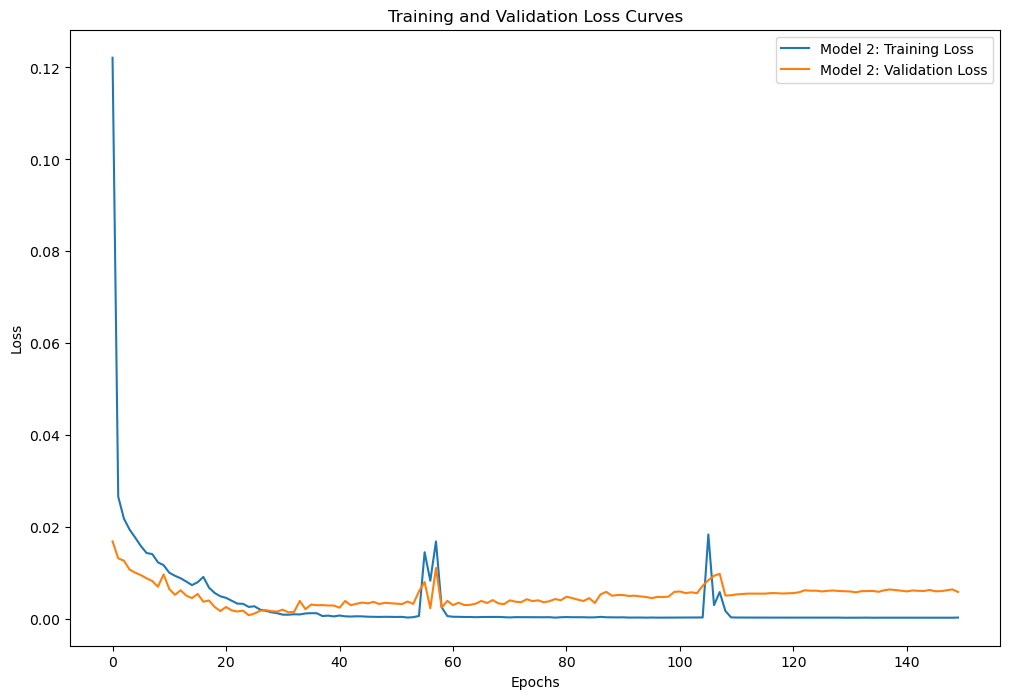

In [227]:
# Plot the training and validation loss curves
plt.figure(figsize=(12, 8))
plt.plot(history_2.history['loss'], label='Model 2: Training Loss')
plt.plot(history_2.history['val_loss'], label='Model 2: Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Observation and Analysis of Model 2
Convergence: 
1. Both the training and validation loss are not converged.
2. Based on the overall trend of the training loss and validation loss curve do not stabilise.

Loss trend: 
1. Based on the overall trend of the training loss and validation loss over epochs, both decrease as the training progresses. 
2. At some point during the training, the training and validation loss have a sharp increase. 
3. This means that it starts to overfit the training data, leading to poor generalisation to new data. 
4. As a result, the validation loss starts increasing. 

Gap between Training Loss and Validation Loss: 
1. The gap or difference between the training loss and validation loss is quite small. 
2. A small gap indicates that the model is generalizing well to unseen data.

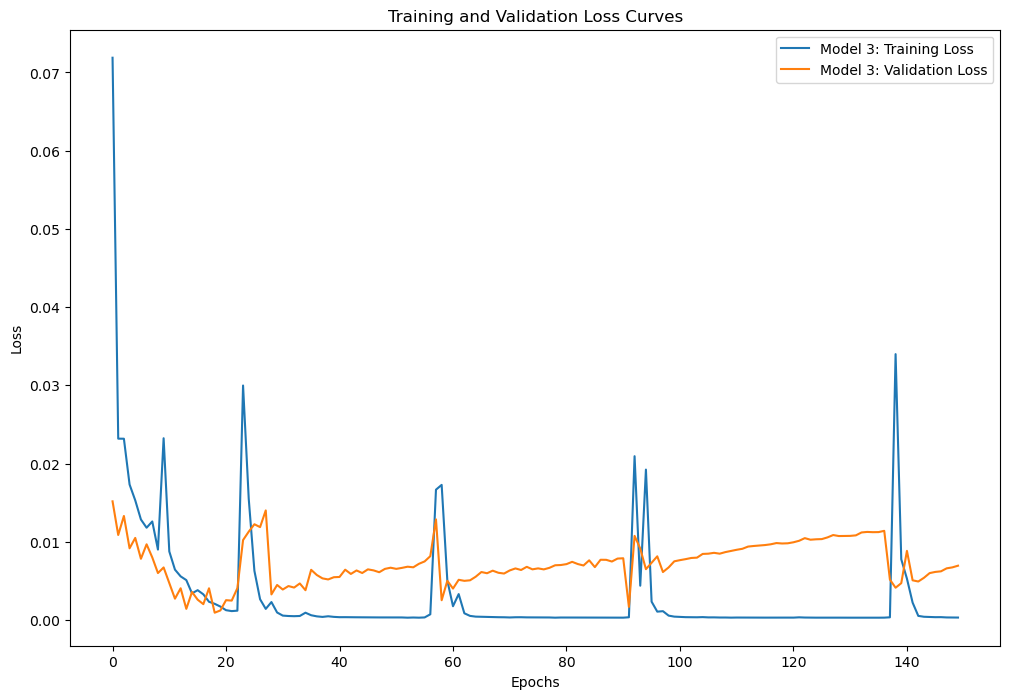

In [228]:
# Plot the training and validation loss curves
plt.figure(figsize=(12, 8))
plt.plot(history_3.history['loss'], label='Model 3: Training Loss')
plt.plot(history_3.history['val_loss'], label='Model 3: Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Observation and Analysis of Model 3
Convergence: 
1. Both the training and validation loss are not converged. 
2. Based on the overall trend of the training loss and validation loss curve do not stabilise.

Loss trend: 
1. At some point during the training, the training and validation loss have a sharp increase. 
2. This means that it starts to overfit the training data, leading to poor generalisation to new data.
3. As a result, the validation loss starts increasing. 

Gap between training loss and validation loss:
1. There is a large gap between the training loss and validation loss.
2. This indicates overfitting, as the model performs significantly better on the training data compared to the validation data.

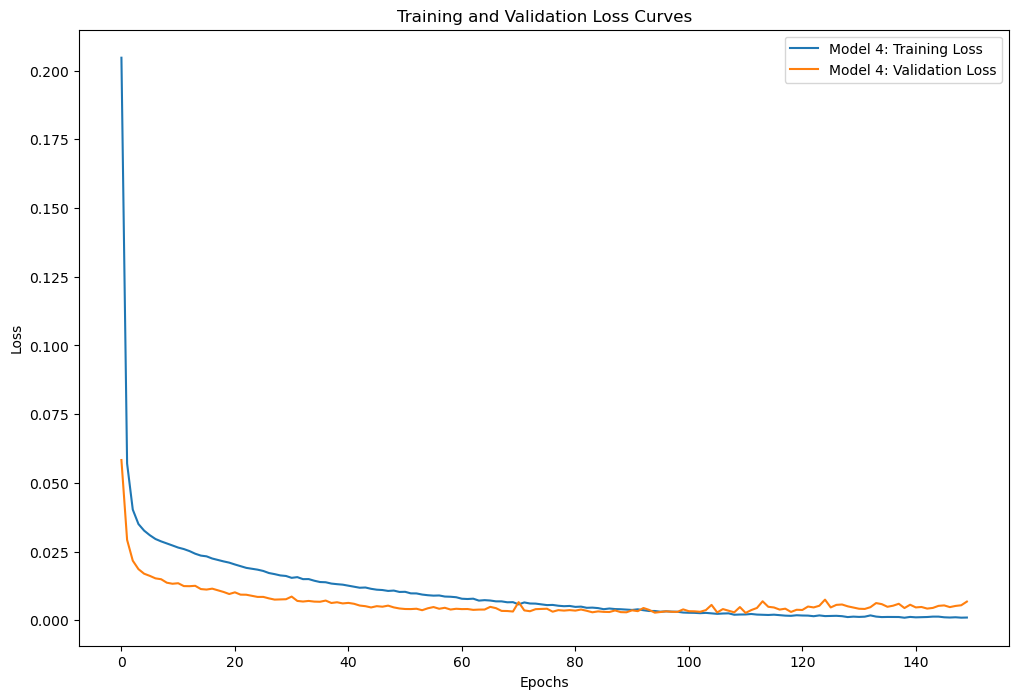

In [229]:
# Plot the training and validation loss curves
plt.figure(figsize=(12, 8))
plt.plot(history_4.history['loss'], label='Model 4: Training Loss')
plt.plot(history_4.history['val_loss'], label='Model 4: Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Observation and Analysis of Model 4
Convergence: 
1. Both the training and validation loss are converged.
2. The loss curve stabilize at the end.

Loss trend: 
1. Based on the overall trend of the training loss and validation loss over epochs, both decrease as the training progresses. 

Gap between Training Loss and Validation Loss: 
1. The gap or difference between the training loss and validation loss is small. 
2. A small gap indicates that the model is generalizing well to unseen data.

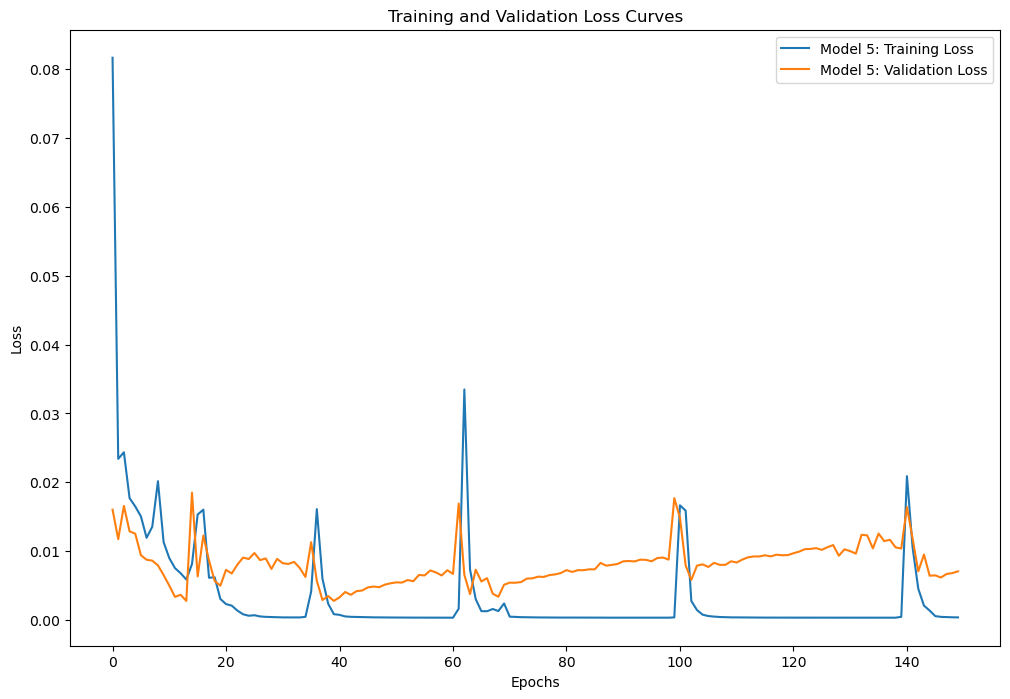

In [230]:
# Plot the training and validation loss curves
plt.figure(figsize=(12, 8))
plt.plot(history_5.history['loss'], label='Model 5: Training Loss')
plt.plot(history_5.history['val_loss'], label='Model 5: Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Observation and Analysis of Model 5
Convergence: 
1. Both the training and validation loss are not converged. 
2. Based on the overall trend of the training loss and validation loss curve do not stabilise.

Loss trend: 
1. At some point during the training, the training and validation loss have a sharp increase. 
2. This means that it starts to overfit the training data, leading to poor generalisation to new data.
3. As a result, the validation loss starts increasing. 

Gap between training loss and validation loss:
1. There is a large gap between the training loss and validation loss.
2. This indicates overfitting, as the model performs significantly better on the training data compared to the validation data.

In [243]:
# Predicting the model and Evaluation of validation set
predictions1 = model_1.predict(X_val_scaled)
predictions2 = model_2.predict(X_val_scaled)
predictions3 = model_3.predict(X_val_scaled)
predictions4 = model_4.predict(X_val_scaled)
predictions5 = model_5.predict(X_val_scaled)

26/26 [==============================] - 0s 997us/step


In [244]:
rounded1 = [int(round(x[0])) for x in predictions1]
rounded2 = [int(round(x[0])) for x in predictions2]
rounded3 = [int(round(x[0])) for x in predictions3]
rounded4 = [int(round(x[0])) for x in predictions4]
rounded5 = [int(round(x[0])) for x in predictions5]

<Axes: >

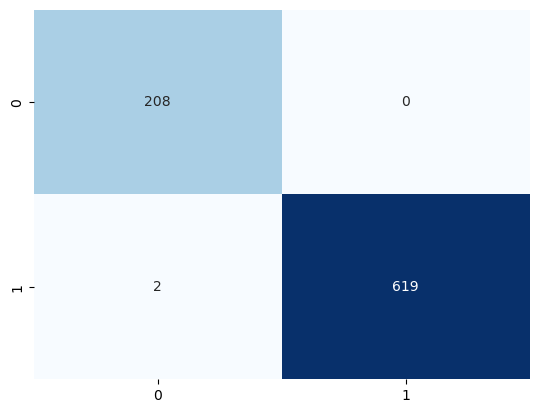

In [245]:
# Model 1 Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, rounded1)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

In [246]:
# Model 1 Accuracy Score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_val, rounded1)
print("Accuracy of the model 1: ", ac)

Accuracy of the model 1:  0.9975874547647768


<Axes: >

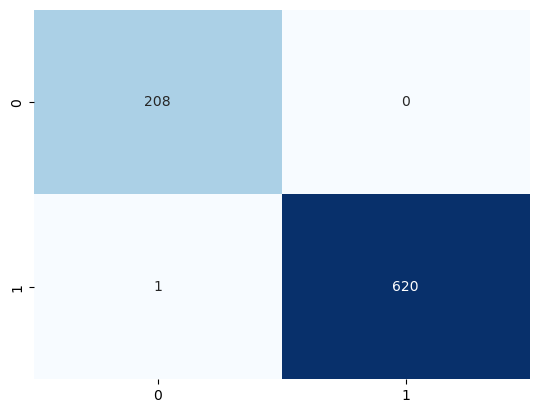

In [247]:
# Model 2 Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, rounded2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

In [248]:
# Model 2 Accuracy Score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_val, rounded2)
print("Accuracy of the model 2: ", ac)

Accuracy of the model 2:  0.9987937273823885


<Axes: >

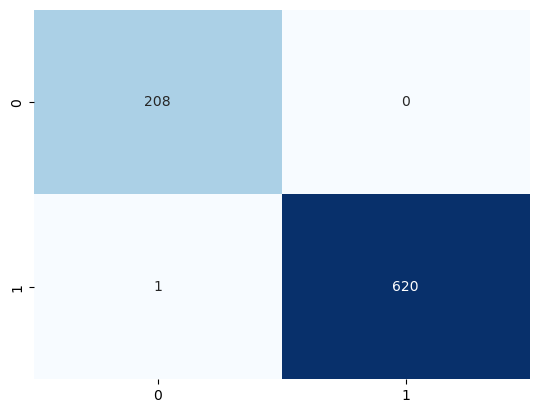

In [250]:
# Model 3 Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, rounded3)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

In [251]:
# Model 3 Accuracy Score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_val, rounded3)
print("Accuracy of the model 3: ", ac)

Accuracy of the model 3:  0.9987937273823885


<Axes: >

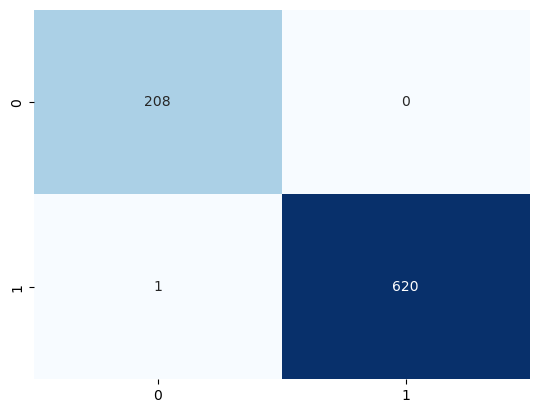

In [252]:
# Model 4 Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, rounded4)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

In [253]:
# Model 4 Accuracy Score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_val, rounded4)
print("Accuracy of the model 4: ", ac)

Accuracy of the model 4:  0.9987937273823885


<Axes: >

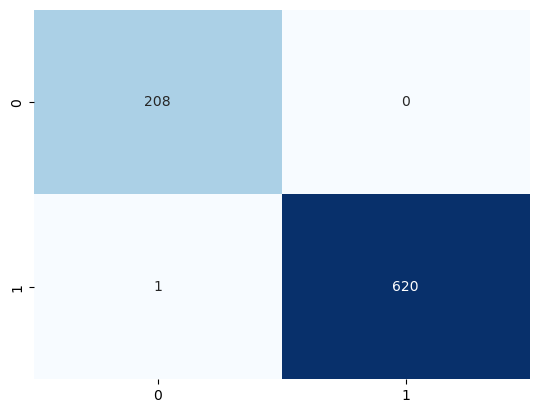

In [254]:
# Model 5 Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, rounded5)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

In [263]:
# Model 5 Accuracy Score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_val, rounded5)
print("Accuracy of the model 5: ", ac)

Accuracy of the model 5:  0.9987937273823885


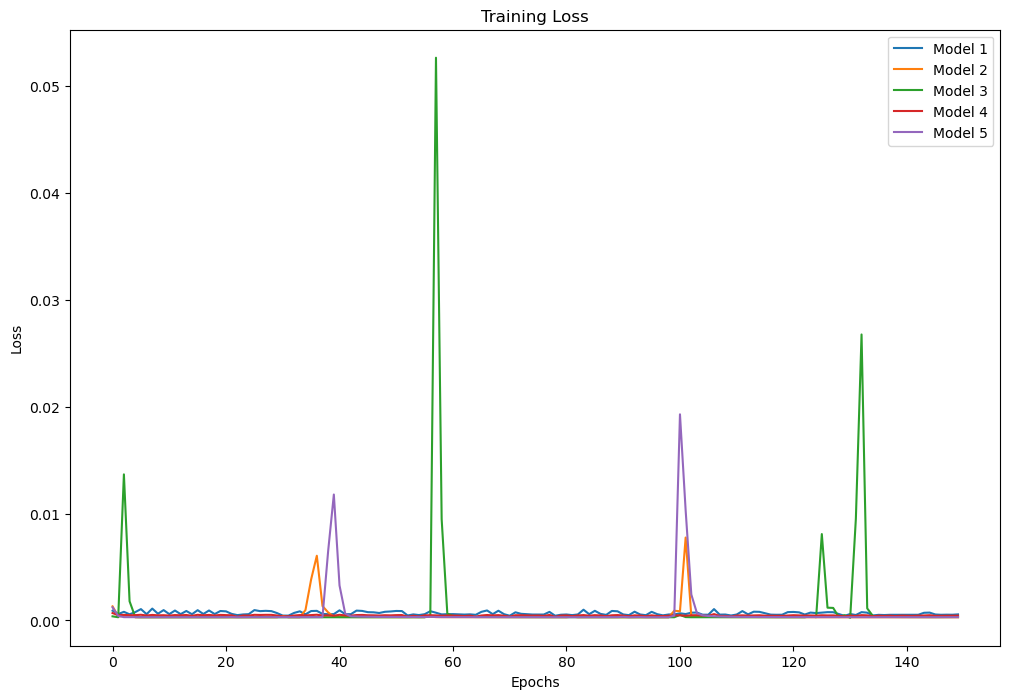

In [268]:
# Define a list to store the models
models = [model_1, model_2, model_3, model_4, model_5]

# Train and evaluate the models
histories = []
for model in models:
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_std, y_train, validation_data=(X_val_scaled, y_val), epochs=no_epochs, batch_size=32, verbose=0)
    histories.append(history)

# Plot the training and validation loss curves
plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'Model {i+1}')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Decide the best model: 
The best model is model 1 because it has lowest loss value and highest accuracy score.

In [287]:
# Step 3: Model Tuning
# Based on the training and validation loss curves, select the best model architecture.
best_model_index = np.argmin(histories[-1].history['val_loss'])
if best_model_index < len(models):
    best_model = models[best_model_index]
else:
    best_model = models[-1]  # Use the last model as the default

# Define the hyperparameters to tune
learning_rates = [0.001, 0.01, 0.1]
activation_functions = ['relu', 'tanh', tf.keras.layers.LeakyReLU(alpha=0.1)]
optimizers = ['adam', 'rmsprop', 'sgd']

# Perform hyperparameter tuning and record the results in a table
results = []
for lr in learning_rates:
    for activation in activation_functions:
        for optimizer in optimizers:
            model = Sequential()
            model.add(Dense(64, input_dim = 12, activation = 'relu'))
            model.add(Dense(1, activation='sigmoid'))
            model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
            history = model.fit(X_train_std, y_train, validation_data=(X_val_scaled, y_val), epochs=no_epochs, batch_size=32, verbose=0)
            loss, accuracy = model.evaluate(X_val_scaled, y_val)
            results.append({'Learning Rate': lr, 'Activation Function': activation, 'Optimizer': optimizer, 'Validation Loss': loss, 'Validation Accuracy': accuracy})

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)

26/26 [==============================] - 0s 1ms/step - loss: 0.0124 - accuracy: 0.9988
    Learning Rate                                Activation Function  \
0           0.001                                               relu   
1           0.001                                               relu   
2           0.001                                               relu   
3           0.001                                               tanh   
4           0.001                                               tanh   
5           0.001                                               tanh   
6           0.001  <keras.layers.activation.leaky_relu.LeakyReLU ...   
7           0.001  <keras.layers.activation.leaky_relu.LeakyReLU ...   
8           0.001  <keras.layers.activation.leaky_relu.LeakyReLU ...   
9           0.010                                               relu   
10          0.010                                               relu   
11          0.010                                

Test data: 
(975, 12)
[[-0.20220915 -1.01441605  2.98000991 ... -1.01742154  1.41217211
   2.49812985]
 [ 0.32858987  1.65555986 -0.73484817 ... -0.56354207 -0.51839687
  -0.96163805]
 [-0.35386601  0.23535991  0.17634343 ... -0.62838199  1.24429655
   1.34487388]
 ...
 [ 0.176933   -0.27591208  2.76973492 ... -0.75806184 -1.35777469
  -0.96163805]
 [-0.35386601 -0.61676007  0.10625177 ...  0.99261611 -0.26658353
   0.19161791]
 [ 0.02527614 -0.67356806  0.66698507 ...  1.12229596 -0.93808578
   0.19161791]]

The results of prediction: 
31/31 [==============================] - 0s 1ms/step
(975, 1)
The first element of Y_pred array: 
[1.]

The results of Y_pred: 
[[1.00000000e+00]
 [1.24938168e-07]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [4.03103784e-15]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.92282496e-05]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.87973816e-18]
 [1.11361744e-03]
 [1.00000000e+00]
 [5.81185489e-10]
 [1.00000000e+00]
 [1.0

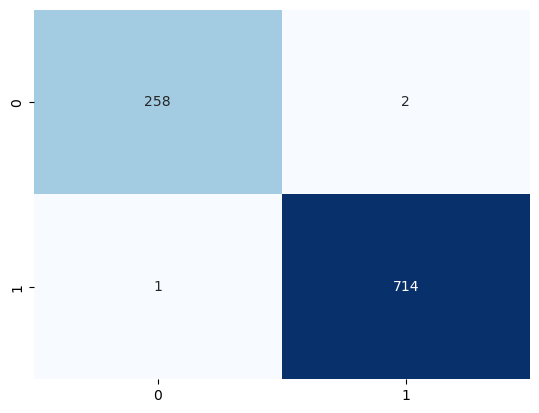

In [289]:
# Step 4: Model Evaluation

#print the test data
print("Test data: ")
print(X_test_std.shape)
print(X_test_std)
print()

# Make predictions on the scaled test data
print("The results of prediction: ")
Y_pred = best_model.predict(X_test_std)
print(Y_pred.shape)
print("The first element of Y_pred array: ")
print(Y_pred[0])
print()
print("The results of Y_pred: ")
print(Y_pred)

# Evaluate the best model on the testing data
test_loss, test_accuracy = best_model.evaluate(X_test_std, y_test)

# Compare the validation and testing results
if best_model_index < len(histories):
    print("Validation Loss:", histories[best_model_index].history['val_loss'][-1])
    print("Validation Accuracy:", histories[best_model_index].history['val_accuracy'][-1])
print("Testing Loss:", test_loss)
print("Testing Accuracy:", test_accuracy)
print("Validation Loss: ", loss)
print("Validation Accuracy: ", accuracy)

# Round the prediction probablities and convert them to integers
rounded = [int(round(x[0])) for x in Y_pred]

# Model Confusion Matrix
# Calculate the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rounded)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Model Accuracy Score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, rounded)
print("Accuracy of the model: ", ac)